In [110]:
import os
from selenium import webdriver
from selenium.webdriver.common.by import By
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import time
from geopy.geocoders import Nominatim
import folium

# 문제1) 스타벅스

In [2]:
# 객체 생성
chrome_options = webdriver.ChromeOptions()
chrome_options.binary_location = "./chromedriver"
driver = webdriver.Chrome(options = chrome_options)

# 웹페이지 접근(스타벅스)
driver.get("https://www.starbucks.co.kr/index.do")

In [3]:
# 매장 찾기 페이지 이동
driver.find_element(By.XPATH, '//*[@id="gnb"]/div/nav/div/ul/li[3]/h2/a').click()
driver.find_element(By.XPATH, '//*[@id="container"]/section[1]/article/div[2]/a').click()

In [4]:
# 지역검색 클릭
driver.find_element(By.XPATH, '//*[@id="container"]/div/form/fieldset/div/section/article[1]/article/header[2]/h3/a').click()

# 서울시 클릭
driver.find_element(By.XPATH, '//*[@id="container"]/div/form/fieldset/div/section/article[1]/article/article[2]/div[1]/div[2]/ul/li[1]/a').click()

In [5]:
# 서울시 전체 클릭
driver.find_element(By.XPATH, '//*[@id="mCSB_2_container"]/ul/li[1]/a').click()

In [6]:
# 페이지 정보 갖고오기
req = driver.page_source
soup = BeautifulSoup(req, "html.parser")

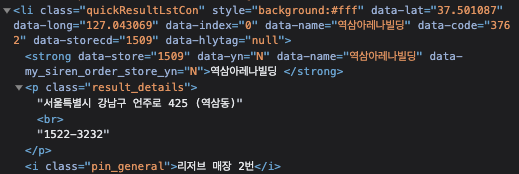

In [7]:
# 매장 정보를 얻기위해 class 찾기
shop_list = soup.find_all(class_ = "quickResultLstCon")

In [8]:
# 매장 개수 확인
len(shop_list)

611

In [9]:
# 0번째 매장의 이름 확인
shop_list[0].find("strong")['data-name']

'무교로'

In [10]:
# 0번째 매장의 주소 확인
shop_list[0].find(class_ = 'result_details').contents[0]

'서울특별시 중구 무교로 15 (무교동)'

In [11]:
# 0번째 매장의 구 이름 확인
shop_list[0].find(class_ = 'result_details').contents[0].split()[1]

'중구'

In [12]:
# 각각의 매장 이름, 주소, 구 이름 리스트에 저장
shop_name = []
shop_address = []
shop_gu = []

for n in range(len(shop_list)):
    name = shop_list[n].find("strong")["data-name"]
    address = shop_list[n].find(class_ = "result_details").contents[0]
    gu = shop_list[n].find(class_ = "result_details").contents[0].split()[1]
    
    shop_name.append(name)
    shop_address.append(address)
    shop_gu.append(gu)

In [13]:
df_starbucks = pd.DataFrame({
    "매장 이름": shop_name,
    "주소": shop_address,
    "구": shop_gu
})

# 🔌 스타벅스 DataFrame (문제1 답)

In [123]:
df_starbucks

,매장 이름,주소,구
0,무교로,서울특별시 중구 무교로 15 (무교동),중구
1,한국프레스센터,서울특별시 중구 세종대로 124 (태평로1가),중구
2,무교동,서울특별시 중구 무교로 21 (무교동) 코오롱빌딩 1층,중구
3,시청,"서울특별시 중구 을지로 19, 삼성화재삼성빌딩 1층 (을지로1가)",중구
4,환구단,서울특별시 중구 소공로 112 (소공동),중구
...,...,...,...
606,사가정역,서울특별시 중랑구 면목로 310,중랑구
607,상봉역,서울특별시 중랑구 망우로 307 (상봉동),중랑구
608,묵동,"서울특별시 중랑구 동일로 952 (묵동, 로프트원 태릉입구역) 1층",중랑구
609,양원역,서울특별시 중랑구 양원역로10길 3 (망우동),중랑구


In [102]:
df_starbucks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 611 entries, 0 to 610
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   매장 이름   611 non-null    object
 1   주소      611 non-null    object
 2   구       611 non-null    object
dtypes: object(3)
memory usage: 19.1+ KB


### 저장

In [2]:
df_starbucks.to_csv("./df_starbucks.csv", encoding = "utf-8" )

NameError: name 'df_starbucks' is not defined

In [2]:
df_starbucks = pd.read_csv("./df_starbucks.csv", index_col = 0, encoding = 'utf-8')

# 문제2) 이디야

In [3]:
# 객체 생성
chrome_options = webdriver.ChromeOptions()
chrome_options.binary_location = "./chromedriver"
driver = webdriver.Chrome(options = chrome_options)
# 웹페이지 접근(이디야)
driver.get("https://ediya.com/")

In [4]:
# 매장찾기 클릭(이동)
driver.find_element(By.XPATH, '/html/body/header/div/div/div[2]/div[1]/ul[1]/li[2]/a').click()

In [5]:
# 주소 icon, XPATH
address_icon = driver.find_element(By.XPATH, '//*[@id="contentWrap"]/div[3]/div/div[1]/ul/li[2]/a')
# 검색란 id
search_section = driver.find_element(By.ID, "keyword")
# 검색 icon, XPATH
search_icon = driver.find_element(By.XPATH, '//*[@id="keyword_div"]/form/button')

### ⚡️ df_starbucks['구'] 활용 

In [6]:
guu = df_starbucks["구"].unique()
len(guu)

25

In [7]:
# 매장 찾기 함수 정의
def search_shop(guu, n):
    address_icon.click()
    search_section.click()
    search_section.send_keys(guu[n])
    search_icon.click()

In [8]:
search_shop(guu, 2)

In [9]:
req = driver.page_source
soup = BeautifulSoup(req, "html.parser")
e_shop_list = soup.find_all(class_ = "item")

In [10]:
len(e_shop_list)

40

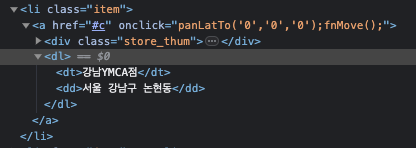

In [11]:
# 이디야 0번째 매장 이름 확인
e_shop_list[0].find("dt").get_text()

'강남YMCA점'

In [12]:
# 이디야 0번째 매장 주소 확인
e_shop_list[0].find("dd").get_text()

'서울 강남구 논현동'

### ⚡️ 이디야 매장 정보를 가져와 저장하는 반복문

In [13]:
# 반복문
e_shop_name = []
e_shop_address = []

for n in range(1, len(guu)):
    search_shop(guu, n)
    
    # "구" 검색 dalay로 인해, 천천히 데이터를 갖고 온다.
    time.sleep(1)
    req = driver.page_source
    soup = BeautifulSoup(req, "html.parser")
    e_shop_list = soup.find_all(class_ = "item")
    
    for i in range(len(e_shop_list)):
        e_name = e_shop_list[i].find("dt").get_text()
        e_address = e_shop_list[i].find("dd").get_text()
        
        e_shop_name.append(e_name)
        e_shop_address.append(e_address)

### ❗️ '중구' 는 부산에 '중구'도 있어 '서울 중구'라 검색해야 됌

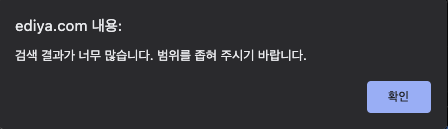

#### 그래서 따로 한번더  '서울 중구' 만 따로 검색해서 정보 넣기 

In [14]:
address_icon.click()
search_section.click()
search_section.send_keys("서울 중구")
search_icon.click()

time.sleep(1)
req = driver.page_source
soup = BeautifulSoup(req, "html.parser")
e_shop_list = soup.find_all(class_ = "item")
    
for i in range(len(e_shop_list)):
    e_name = e_shop_list[i].find("dt").get_text()
    e_address = e_shop_list[i].find("dd").get_text()
        
    e_shop_name.append(e_name)
    e_shop_address.append(e_address)

In [15]:
# 서울시 25개구 이디야 총 매장 개수 확인
len(e_shop_name)

653

In [16]:
# 데이터프레임 만들기
df_ediya = pd.DataFrame({
    "매장 이름": e_shop_name,
    "주소": e_shop_address,
})

In [17]:
df_ediya.head()

,매장 이름,주소
0,경복궁역점,"서울 종로구 자하문로 7 (체부동, 성명빌딩)"
1,경희궁점,서울 종로구 경희궁1길 16 (신문로2가)
2,광화문점,서울 종로구 세종대로23길 15 (도렴동)
3,광화문트윈트리타워점,"서울 종로구 율곡로 6 (중학동, 트윈 트리 빌딩)"
4,낙원동점,서울 종로구 낙원동


In [18]:
# '구' 생성
df_ediya["구"] = df_ediya["주소"].apply(lambda x: x.split()[1])

In [19]:
# 구 개수 확인
len(df_ediya['구'].unique())

25

In [21]:
# 결측치 확인
df_ediya['구'].unique()

array(['종로구', '강남구', '강북구', '강서구', '관악구', '광진구', '금천구', '노원구', '도봉구',
       '동작구', '마포구', '서대문구', '서초구', '성북구', '송파구', '양천구', '영등포구', '은평구',
       '강동구', '구로구', '동대문구', '성동구', '용산구', '중랑구', '중구'], dtype=object)

## 혹시나 한번 더 확인 결과 '부산 강서구'가 들어가 있다.

In [25]:
df_ediya.head(110)

,매장 이름,주소,구
0,경복궁역점,"서울 종로구 자하문로 7 (체부동, 성명빌딩)",종로구
1,경희궁점,서울 종로구 경희궁1길 16 (신문로2가),종로구
2,광화문점,서울 종로구 세종대로23길 15 (도렴동),종로구
3,광화문트윈트리타워점,"서울 종로구 율곡로 6 (중학동, 트윈 트리 빌딩)",종로구
4,낙원동점,서울 종로구 낙원동,종로구
...,...,...,...
105,부산명지롯데시네마점,부산 강서구 명지국제6로 107 (명지동),강서구
106,부산명지점,부산 강서구 명지오션시티8로16번길 25 (명지동),강서구
107,부산명지초교점,부산 강서구 명지국제6로 306 (명지동),강서구
108,부산신호동점,부산 강서구 신호산단5로 42 (신호동),강서구


In [26]:
len(df_ediya)

653

In [27]:
# 부산 강서구 삭제
df_ediya = df_ediya.drop(df_ediya[df_ediya['주소'].str.contains('부산 강서구')].index)

In [28]:
# 부산 강서구 삭제 후 index 개수
len(df_ediya)

645

## '부산 강서구' 삭제

In [30]:
df_ediya.head(110)

,매장 이름,주소,구
0,경복궁역점,"서울 종로구 자하문로 7 (체부동, 성명빌딩)",종로구
1,경희궁점,서울 종로구 경희궁1길 16 (신문로2가),종로구
2,광화문점,서울 종로구 세종대로23길 15 (도렴동),종로구
3,광화문트윈트리타워점,"서울 종로구 율곡로 6 (중학동, 트윈 트리 빌딩)",종로구
4,낙원동점,서울 종로구 낙원동,종로구
...,...,...,...
113,신방화중앙점,"서울 강서구 방화대로34길 92 (방화동, 불해빌딩)",강서구
114,염창동점,서울 강서구 양천로 689 (염창동),강서구
115,염창블루나인점,서울 강서구 양천로 583 (염창동),강서구
116,우장산동점,서울 강서구 우현로 15 (화곡동),강서구


### '구' 기준 정렬

In [44]:
df_ediya.sort_values("구", ascending = True, inplace = True)
df_ediya.reset_index(inplace = True)
del df_ediya["index"]

In [46]:
df_ediya.head()

,매장 이름,주소,구
0,선정릉역점,서울 강남구 봉은사로 326 (역삼동),강남구
1,선릉역점,"서울 강남구 테헤란로 332 (역삼동, HJ타워)",강남구
2,선릉사거리점,"서울 강남구 선릉로 519 (역삼동, 삼능빌딩)",강남구
3,삼성한전점,서울 강남구 테헤란로107길 11 (삼성동),강남구
4,삼성중앙역점,"서울 강남구 삼성로 608 (삼성동, 우창빌딩)",강남구


# 🔌 이디야 DataFrame (문제2 답)

In [122]:
df_ediya

,매장 이름,주소,구
0,선정릉역점,서울 강남구 봉은사로 326 (역삼동),강남구
1,선릉역점,"서울 강남구 테헤란로 332 (역삼동, HJ타워)",강남구
2,선릉사거리점,"서울 강남구 선릉로 519 (역삼동, 삼능빌딩)",강남구
3,삼성한전점,서울 강남구 테헤란로107길 11 (삼성동),강남구
4,삼성중앙역점,"서울 강남구 삼성로 608 (삼성동, 우창빌딩)",강남구
...,...,...,...
640,중랑묵동점,"서울 중랑구 동일로 932 (묵동, 묵동자이아파트)",중랑구
641,중랑역점,서울 중랑구 망우로 198 (상봉동),중랑구
642,중화동점,서울 중랑구 동일로129길 1 (중화동),중랑구
643,화랑대역점,"서울 중랑구 신내로25가길 2 (묵동, 현동학당)",중랑구


In [48]:
df_ediya.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645 entries, 0 to 644
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   매장 이름   645 non-null    object
 1   주소      645 non-null    object
 2   구       645 non-null    object
dtypes: object(3)
memory usage: 15.2+ KB


In [49]:
df_ediya.to_csv("./df_ediya.csv", encoding = "utf-8")

# 문제 3)

In [58]:
df_ex = df_ediya.copy()

In [51]:
!pip install geopy

### 경도, 위도 검색을 위해 주소 내용 중 '( )' 내용 삭제.

In [59]:
ad = df_ex["주소"].str.replace("\([^()]*\)", "")

/var/folders/nc/lry6d8ws417_mblykm_8wpc40000gn/T/ipykernel_73469/4207652807.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  ad = df_ex["주소"].str.replace("\([^()]*\)", "")


In [116]:
ad

0         서울 강남구 봉은사로 326 
1         서울 강남구 테헤란로 332 
2          서울 강남구 선릉로 519 
3      서울 강남구 테헤란로107길 11 
4          서울 강남구 삼성로 608 
              ...         
640        서울 중랑구 동일로 932 
641        서울 중랑구 망우로 198 
642      서울 중랑구 동일로129길 1 
643      서울 중랑구 신내로25가길 2 
644       서울 중랑구 상봉중앙로 36 
Name: 주소, Length: 645, dtype: object

### 경도, 위도 구하기

In [69]:
# 함수 정의
def geocoding(address):
    geolocoder = Nominatim(user_agent = "South Korea", timeout = None)
    geo = geolocoder.geocode(address)
    
    if geo:
        crd = {"lat": str(geo.latitude), "lng": str(geo.longitude)}
    else:
        crd = {"lat": None, "lng": None}
    
    return crd

In [90]:
# 출력 확인
crd = geocoding(ad[0])
print(crd["lat"])
print(crd["lng"])

37.5154003
127.0666917


### 경도, 위도 값 구하기(시간 오래걸림)

In [71]:
# 값 넣기
latt = []
lngg = []

for address in ad:
    crd = geocoding(address)
    latt.append(crd["lat"])
    lngg.append(crd["lng"])

In [88]:
# DataFrame에 추가
df_ex["lat"] = latt
df_ex["lng"] = lngg

### 경도, 위도를 포함한 df(이디야)

In [114]:
df_ex.tail()

,매장 이름,주소,구,lat,lng
640,중랑묵동점,"서울 중랑구 동일로 932 (묵동, 묵동자이아파트)",중랑구,37.5937124,127.0802312
641,중랑역점,서울 중랑구 망우로 198 (상봉동),중랑구,37.5934009,127.0748264
642,중화동점,서울 중랑구 동일로129길 1 (중화동),중랑구,37.5994473,127.0789376
643,화랑대역점,"서울 중랑구 신내로25가길 2 (묵동, 현동학당)",중랑구,37.6192945,127.0845343
644,서울상봉1동점,서울 중랑구 상봉중앙로 36 (상봉동),중랑구,37.6002899,127.0877484


In [91]:
# 일단 저장!!
df_ex.to_csv("./Ediya_DataFrame.csv", encoding = "utf-8")

## 스타벅스 매장도 경도 위도 구하기

In [93]:
df_star = df_starbucks.copy()

In [94]:
ds = df_star["주소"].str.replace("\([^()]*\)", "")

/var/folders/nc/lry6d8ws417_mblykm_8wpc40000gn/T/ipykernel_73469/3747908556.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  ds = df_star["주소"].str.replace("\([^()]*\)", "")


In [117]:
ds

0                   서울특별시 중구 무교로 15 
1                 서울특별시 중구 세종대로 124 
2          서울특별시 중구 무교로 21  코오롱빌딩 1층
3      서울특별시 중구 을지로 19, 삼성화재삼성빌딩 1층 
4                  서울특별시 중구 소공로 112 
                   ...              
606                서울특별시 중랑구 면목로 310
607               서울특별시 중랑구 망우로 307 
608            서울특별시 중랑구 동일로 952  1층
609             서울특별시 중랑구 양원역로10길 3 
610               서울특별시 중랑구 봉화산로 35 
Name: 주소, Length: 611, dtype: object

### 경도, 위도 값 구하기(시간 오래걸림)¶

In [103]:
# 값 넣기
lat_starbuckss = []
lng_starbuckss = []

for address in ds:
    crd = geocoding(address)
    lat_starbuckss.append(crd["lat"])
    lng_starbuckss.append(crd["lng"])

In [104]:
len(lat_starbuckss)

611

In [105]:
len(lng_starbuckss)

611

In [106]:
# DataFrame에 추가
df_star["lat"] = lat_starbuckss
df_star["lng"] = lng_starbuckss

In [113]:
df_star.tail()

,매장 이름,주소,구,lat,lng
606,사가정역,서울특별시 중랑구 면목로 310,중랑구,37.5671595,127.0819519
607,상봉역,서울특별시 중랑구 망우로 307 (상봉동),중랑구,37.5968492,127.086494
608,묵동,"서울특별시 중랑구 동일로 952 (묵동, 로프트원 태릉입구역) 1층",중랑구,37.5696033,127.0794863
609,양원역,서울특별시 중랑구 양원역로10길 3 (망우동),중랑구,37.6066702,127.1065848
610,중화역,서울특별시 중랑구 봉화산로 35,중랑구,37.6027896,127.0846172


In [108]:
# 스터벅스 경도,위도 DataFrame도 저장!!
df_star.to_csv("./Starbucks_DataFrame.csv", encoding = "utf-8")

# 🌕 결론

### 📍 이디야와 스타벅스 매장이 어떻게 분포되어 있는지 시각적으로 확인
- 확실히 파란색 근처에 초록색이 많이 분포한 것을 볼 수 있다.

In [112]:
my_map = folium.Map(location = [37.5502, 126.982], zoom_start = 11,
                   tiles = "Stamen Toner")

# 스타벅스(파란색)
for idx, row in df_star.iterrows():
    if not pd.isna(row["lat"]) and not pd.isna(row["lng"]):
        folium.CircleMarker(
            [row["lat"], row["lng"]],
            radius = 3,
            color = "blue",
            fill = True,
            fill_color = "blue").add_to(my_map)

# 이디야(초록색)
for idx, row in df_ex.iterrows():
    if not pd.isna(row["lat"]) and not pd.isna(row["lng"]):
        folium.CircleMarker(
            [row["lat"], row["lng"]],
            radius = 3, 
            color = "green",
            fill = True,
            fill_color = "green").add_to(my_map) 

my_map

### ❗️혹시 몰라 실행 결과 사진 남깁니다.

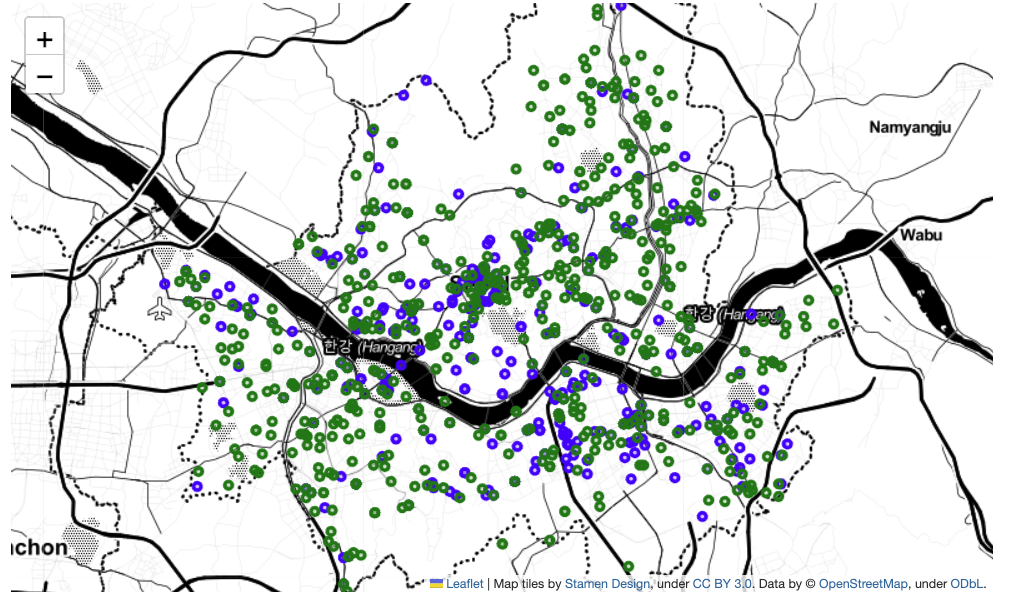

### 추가적으로

In [119]:
ediya_counts = df_ediya['구'].value_counts()
starbucks_counts = df_starbucks['구'].value_counts()

### 각 "구"별로 이디야와 스타벅스 매장 수를 계산한 결과입니다

In [120]:
ediya_counts, starbucks_counts

(강남구     40
 영등포구    40
 송파구     37
 마포구     32
 강서구     31
 중구      30
 서초구     29
 종로구     29
 중랑구     29
 성북구     27
 구로구     25
 관악구     25
 동대문구    24
 강동구     24
 노원구     24
 양천구     24
 은평구     24
 도봉구     22
 광진구     22
 동작구     21
 성동구     20
 금천구     20
 서대문구    18
 강북구     14
 용산구     14
 Name: 구, dtype: int64,
 강남구     88
 중구      62
 서초구     49
 영등포구    41
 종로구     41
 마포구     36
 송파구     36
 용산구     25
 강서구     25
 서대문구    22
 광진구     18
 양천구     17
 강동구     17
 성북구     15
 노원구     14
 구로구     14
 성동구     14
 은평구     13
 금천구     12
 관악구     12
 동작구     11
 동대문구    10
 중랑구      8
 강북구      6
 도봉구      5
 Name: 구, dtype: int64)

#### "강남구"에는 이디야 매장이 40개, 스타벅스 매장이 88개 있습니다
#### 여기서, 이디야 매장이 위치한 "구" 중에서 스타벅스 매장도 함께 위치한 "구"의 비율을 계산을 해보면

In [121]:
common_districts = set(ediya_counts.index) & set(starbucks_counts.index)
proportion_common = len(common_districts) / len(ediya_counts.index)
proportion_common

1.0

#### 분석 결과, 이디야 매장이 위치한 모든 "구"에서 스타벅스 매장도 함께 위치하고 있습니다. 
#### 즉, 이디야 매장이 있는 "구"의 100%에서 스타벅스 매장도 위치하고 있습니다.
#### 이를 통해 추가적으로 이디야 매장은 스타벅스 매장 근처, 
#### 즉 같은 "구" 내에 위치하는 경향이 있음을 확인할 수 있습니다.